### HARINASANDRATRA Lahatra Fitiavana

## Zimnat Insurance Recommendation challenge

In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.feature_selection import chi2

import warnings
warnings.filterwarnings('ignore')

###### import the datasets

In [181]:
train_set=pd.read_csv('Train.csv')
test_set=pd.read_csv('Test.csv')
submission_model=pd.read_csv('SampleSubmission.csv')

In [182]:
train_set

,ID,join_date,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,P5DA,RIBP,...,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3
0,4WKQSBB,1/2/2019,F,M,1987,1X1H,2A7I,T4MS,0,0,...,0,0,0,1,0,0,0,0,0,0
1,CP5S02H,1/6/2019,F,M,1981,UAOD,2A7I,T4MS,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2YKDILJ,1/6/2013,M,U,1991,748L,QZYX,90QI,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2S9E81J,1/8/2019,M,M,1990,1X1H,BP09,56SI,0,0,...,0,0,0,1,0,0,0,0,0,0
4,BHDYVFT,1/8/2019,M,M,1990,748L,NO3L,T4MS,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29127,8SBA93U,1/9/2019,F,M,1974,748L,2A7I,T4MS,0,0,...,0,0,0,1,0,0,0,0,0,0
29128,Y73ETTO,1/11/2018,M,M,1987,XX25,Q6J6,90QI,0,0,...,0,0,0,1,0,0,0,0,0,0
29129,MVXG2LC,1/2/2019,M,M,1985,BOAS,6PE7,T4MS,0,0,...,0,0,0,1,0,0,0,0,0,0
29130,BUQ8DQN,1/7/2019,M,M,1989,UAOD,2A7I,T4MS,0,0,...,0,0,0,1,0,0,0,0,0,0


### exploratory data analysis

In [183]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29132 entries, 0 to 29131
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ID                        29132 non-null  object
 1   join_date                 29130 non-null  object
 2   sex                       29132 non-null  object
 3   marital_status            29132 non-null  object
 4   birth_year                29132 non-null  int64 
 5   branch_code               29132 non-null  object
 6   occupation_code           29132 non-null  object
 7   occupation_category_code  29132 non-null  object
 8   P5DA                      29132 non-null  int64 
 9   RIBP                      29132 non-null  int64 
 10  8NN1                      29132 non-null  int64 
 11  7POT                      29132 non-null  int64 
 12  66FJ                      29132 non-null  int64 
 13  GYSR                      29132 non-null  int64 
 14  SOP4                  

###### missing values : NaN

In [184]:
print((train_set.isna().sum()/train_set.shape[0]).sort_values(ascending=True))
print((test_set.isna().sum()/test_set.shape[0]).sort_values(ascending=True))

ID                          0.000000
J9JW                        0.000000
JZ9D                        0.000000
JWFN                        0.000000
QBOL                        0.000000
K6QO                        0.000000
FM3X                        0.000000
BSTQ                        0.000000
AHXO                        0.000000
N2MW                        0.000000
LJR9                        0.000000
PYUQ                        0.000000
RVSZ                        0.000000
GHYX                        0.000000
SOP4                        0.000000
66FJ                        0.000000
7POT                        0.000000
8NN1                        0.000000
RIBP                        0.000000
P5DA                        0.000000
occupation_category_code    0.000000
occupation_code             0.000000
branch_code                 0.000000
birth_year                  0.000000
marital_status              0.000000
sex                         0.000000
GYSR                        0.000000
E

Since missing values represent a tiny part of the dataset, we will replace the missing values by the most frequent ones.We won't drop them for they may be important to strengthen the model.

In [185]:
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')

train_set['join_date']=pd.DataFrame(imputer.fit_transform(np.array(train_set['join_date']).reshape(-1,1)))
test_set['join_date']=pd.DataFrame(imputer.fit_transform(np.array(test_set['join_date']).reshape(-1,1)))

In [186]:
train_set.columns = [
    'ID', 'join_date', 'sex', 'marital_status', 'birth_year', 'branch_code',
    'occupation_code', 'occupation_category_code', 'P5DA', 'RIBP', '8NN1',
    '7POT', '66FJ', 'GYSR', 'SOP4', 'RVSZ', 'PYUQ', 'LJR9', 'N2MW', 'AHXO',
    'BSTQ', 'FM3X', 'K6QO', 'QBOL', 'JWFN', 'JZ9D', 'J9JW', 'GHYX', 'ECY3',
]

test_set.columns = [
    'ID', 'join_date', 'sex', 'marital_status', 'birth_year', 'branch_code',
    'occupation_code', 'occupation_category_code', 'P5DA', 'RIBP', '8NN1',
    '7POT', '66FJ', 'GYSR', 'SOP4', 'RVSZ', 'PYUQ', 'LJR9', 'N2MW', 'AHXO',
    'BSTQ', 'FM3X', 'K6QO', 'QBOL', 'JWFN', 'JZ9D', 'J9JW', 'GHYX', 'ECY3',
]

<AxesSubplot:>

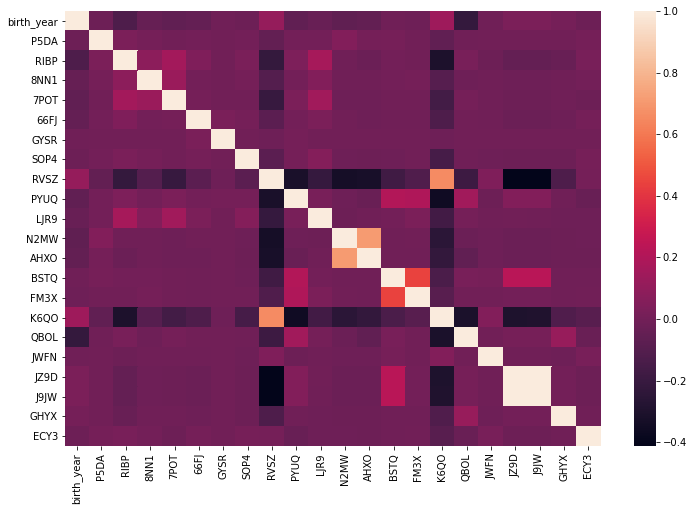

In [187]:
plt.figure(figsize=(12,8))
sns.heatmap(train_set.corr(),cbar=True)

#### preprocessing

In [188]:
train_set["join_date"] = pd.to_datetime(train_set["join_date"], format="%d/%m/%Y")
train_set["entering_age"] = train_set["join_date"].dt.year -train_set["birth_year"]

test_set["join_date"] = pd.to_datetime(test_set["join_date"], format="%d/%m/%Y")
test_set["entering_age"] = test_set["join_date"].dt.year - test_set["birth_year"]

The major transformation for the dataset

In [189]:
pcode=train_set.drop(columns=['ID','join_date','sex','marital_status','birth_year','branch_code','occupation_code','occupation_category_code','entering_age'])

features=['ID','join_date','sex','marital_status','birth_year','branch_code','occupation_code','occupation_category_code','entering_age']

train_set =train_set.melt(id_vars=features, value_vars=pcode, var_name = "PCODE", value_name="Label" )
test_set =test_set.melt(id_vars=features, value_vars=pcode, var_name = "PCODE", value_name="Label" )

only for the testset

In [190]:
test_set['ID X PCODE'] = test_set['ID'] + ' X ' + test_set['PCODE']

In [191]:
train_set

,ID,join_date,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,entering_age,PCODE,Label
0,4WKQSBB,2019-02-01,F,M,1987,1X1H,2A7I,T4MS,32,P5DA,0
1,CP5S02H,2019-06-01,F,M,1981,UAOD,2A7I,T4MS,38,P5DA,0
2,2YKDILJ,2013-06-01,M,U,1991,748L,QZYX,90QI,22,P5DA,0
3,2S9E81J,2019-08-01,M,M,1990,1X1H,BP09,56SI,29,P5DA,0
4,BHDYVFT,2019-08-01,M,M,1990,748L,NO3L,T4MS,29,P5DA,0
...,...,...,...,...,...,...,...,...,...,...,...
611767,8SBA93U,2019-09-01,F,M,1974,748L,2A7I,T4MS,45,ECY3,0
611768,Y73ETTO,2018-11-01,M,M,1987,XX25,Q6J6,90QI,31,ECY3,0
611769,MVXG2LC,2019-02-01,M,M,1985,BOAS,6PE7,T4MS,34,ECY3,0
611770,BUQ8DQN,2019-07-01,M,M,1989,UAOD,2A7I,T4MS,30,ECY3,0


In [192]:
test_set

,ID,join_date,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,entering_age,PCODE,Label,ID X PCODE
0,F86J5PC,2018-12-01,M,M,1984,94KC,DZRV,90QI,34,P5DA,0,F86J5PC X P5DA
1,H6141K3,2019-10-01,M,M,1996,1X1H,J9SY,90QI,23,P5DA,0,H6141K3 X P5DA
2,RBAYUXZ,2020-01-01,F,W,1968,UAOD,2A7I,T4MS,52,P5DA,0,RBAYUXZ X P5DA
3,KCBILBQ,2019-02-01,M,M,1989,94KC,2A7I,T4MS,30,P5DA,0,KCBILBQ X P5DA
4,LSEC1ZJ,2020-02-01,F,M,1982,UAOD,0KID,T4MS,38,P5DA,0,LSEC1ZJ X P5DA
...,...,...,...,...,...,...,...,...,...,...,...,...
209995,0GMU5UH,2019-04-01,F,M,1986,748L,2A7I,T4MS,33,ECY3,0,0GMU5UH X ECY3
209996,I9W11CD,2019-08-01,M,M,1980,UAOD,0KID,T4MS,39,ECY3,0,I9W11CD X ECY3
209997,42WTEGT,2018-04-01,M,M,1993,748L,SST3,56SI,25,ECY3,0,42WTEGT X ECY3
209998,8EKC4O9,2015-05-01,F,U,1981,49BM,2A7I,T4MS,34,ECY3,0,8EKC4O9 X ECY3


#### encoding

In [193]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()

In [194]:
def encode(df):
    for col in ['marital_status','branch_code','occupation_code','sex','occupation_category_code','PCODE']:
        df[col]=encoder.fit_transform(df[col])
    return df

In [195]:
X_train=encode(train_set)
X_test=encode(test_set)

### Model

In [196]:
from catboost import CatBoostClassifier

In [197]:
y_train=X_train['Label']
y_test=X_test[['ID X PCODE','Label']]
X_train.drop(columns=['Label'],inplace=True)
X_test.drop(columns=['ID X PCODE','Label'],inplace=True)

In [198]:
model=CatBoostClassifier(iterations=1500,learning_rate=0.097,depth=4)

In [199]:
model.fit(X_train,y_train,cat_features=['ID'])

0:	learn: 0.5580986	total: 566ms	remaining: 14m 8s
1:	learn: 0.4589949	total: 1.11s	remaining: 13m 53s
2:	learn: 0.3866730	total: 1.5s	remaining: 12m 27s
3:	learn: 0.3480206	total: 1.97s	remaining: 12m 16s
4:	learn: 0.3070080	total: 2.29s	remaining: 11m 25s
5:	learn: 0.2848425	total: 2.67s	remaining: 11m 3s
6:	learn: 0.2585184	total: 2.96s	remaining: 10m 30s
7:	learn: 0.2457163	total: 3.26s	remaining: 10m 8s
8:	learn: 0.2358088	total: 3.55s	remaining: 9m 48s
9:	learn: 0.2183721	total: 3.96s	remaining: 9m 50s
10:	learn: 0.2075284	total: 4.33s	remaining: 9m 46s
11:	learn: 0.1992355	total: 4.64s	remaining: 9m 35s
12:	learn: 0.1906099	total: 5.02s	remaining: 9m 34s
13:	learn: 0.1840773	total: 5.31s	remaining: 9m 23s
14:	learn: 0.1815314	total: 5.68s	remaining: 9m 22s
15:	learn: 0.1773598	total: 6.02s	remaining: 9m 18s
16:	learn: 0.1748481	total: 6.34s	remaining: 9m 12s
17:	learn: 0.1719182	total: 6.67s	remaining: 9m 9s
18:	learn: 0.1694434	total: 6.98s	remaining: 9m 4s
19:	learn: 0.1664192

158:	learn: 0.1259793	total: 52.5s	remaining: 7m 23s
159:	learn: 0.1259009	total: 52.9s	remaining: 7m 22s
160:	learn: 0.1258790	total: 53.1s	remaining: 7m 21s
161:	learn: 0.1258188	total: 53.4s	remaining: 7m 20s
162:	learn: 0.1254935	total: 53.7s	remaining: 7m 20s
163:	learn: 0.1254135	total: 54s	remaining: 7m 20s
164:	learn: 0.1253294	total: 54.3s	remaining: 7m 19s
165:	learn: 0.1251254	total: 54.6s	remaining: 7m 18s
166:	learn: 0.1250102	total: 55s	remaining: 7m 18s
167:	learn: 0.1249779	total: 55.2s	remaining: 7m 18s
168:	learn: 0.1248945	total: 55.6s	remaining: 7m 17s
169:	learn: 0.1247950	total: 55.8s	remaining: 7m 16s
170:	learn: 0.1244235	total: 56.1s	remaining: 7m 16s
171:	learn: 0.1243176	total: 56.5s	remaining: 7m 16s
172:	learn: 0.1242201	total: 57s	remaining: 7m 17s
173:	learn: 0.1241773	total: 57.3s	remaining: 7m 16s
174:	learn: 0.1241607	total: 57.7s	remaining: 7m 16s
175:	learn: 0.1240355	total: 57.9s	remaining: 7m 15s
176:	learn: 0.1239125	total: 58.3s	remaining: 7m 15s

312:	learn: 0.1144355	total: 1m 42s	remaining: 6m 28s
313:	learn: 0.1144286	total: 1m 42s	remaining: 6m 28s
314:	learn: 0.1143961	total: 1m 43s	remaining: 6m 27s
315:	learn: 0.1143128	total: 1m 43s	remaining: 6m 27s
316:	learn: 0.1142804	total: 1m 43s	remaining: 6m 27s
317:	learn: 0.1142446	total: 1m 44s	remaining: 6m 27s
318:	learn: 0.1141958	total: 1m 44s	remaining: 6m 26s
319:	learn: 0.1139699	total: 1m 44s	remaining: 6m 26s
320:	learn: 0.1139293	total: 1m 45s	remaining: 6m 26s
321:	learn: 0.1138721	total: 1m 45s	remaining: 6m 25s
322:	learn: 0.1138476	total: 1m 45s	remaining: 6m 25s
323:	learn: 0.1138247	total: 1m 46s	remaining: 6m 25s
324:	learn: 0.1137028	total: 1m 46s	remaining: 6m 24s
325:	learn: 0.1136969	total: 1m 46s	remaining: 6m 24s
326:	learn: 0.1136601	total: 1m 47s	remaining: 6m 23s
327:	learn: 0.1136369	total: 1m 47s	remaining: 6m 23s
328:	learn: 0.1135131	total: 1m 47s	remaining: 6m 23s
329:	learn: 0.1134912	total: 1m 48s	remaining: 6m 22s
330:	learn: 0.1134724	total:

466:	learn: 0.1079011	total: 2m 31s	remaining: 5m 35s
467:	learn: 0.1078988	total: 2m 32s	remaining: 5m 35s
468:	learn: 0.1078858	total: 2m 32s	remaining: 5m 35s
469:	learn: 0.1078785	total: 2m 32s	remaining: 5m 34s
470:	learn: 0.1078646	total: 2m 33s	remaining: 5m 34s
471:	learn: 0.1078392	total: 2m 33s	remaining: 5m 33s
472:	learn: 0.1078291	total: 2m 33s	remaining: 5m 33s
473:	learn: 0.1077626	total: 2m 33s	remaining: 5m 33s
474:	learn: 0.1077584	total: 2m 34s	remaining: 5m 32s
475:	learn: 0.1077290	total: 2m 34s	remaining: 5m 32s
476:	learn: 0.1077084	total: 2m 34s	remaining: 5m 32s
477:	learn: 0.1076610	total: 2m 35s	remaining: 5m 31s
478:	learn: 0.1076525	total: 2m 35s	remaining: 5m 31s
479:	learn: 0.1076210	total: 2m 35s	remaining: 5m 31s
480:	learn: 0.1075858	total: 2m 36s	remaining: 5m 30s
481:	learn: 0.1074982	total: 2m 36s	remaining: 5m 30s
482:	learn: 0.1074753	total: 2m 36s	remaining: 5m 30s
483:	learn: 0.1074682	total: 2m 37s	remaining: 5m 30s
484:	learn: 0.1074224	total:

620:	learn: 0.1044432	total: 3m 22s	remaining: 4m 46s
621:	learn: 0.1044386	total: 3m 22s	remaining: 4m 46s
622:	learn: 0.1044280	total: 3m 23s	remaining: 4m 46s
623:	learn: 0.1044121	total: 3m 23s	remaining: 4m 45s
624:	learn: 0.1043580	total: 3m 23s	remaining: 4m 45s
625:	learn: 0.1043535	total: 3m 24s	remaining: 4m 45s
626:	learn: 0.1043529	total: 3m 24s	remaining: 4m 44s
627:	learn: 0.1043434	total: 3m 24s	remaining: 4m 44s
628:	learn: 0.1042996	total: 3m 25s	remaining: 4m 44s
629:	learn: 0.1042760	total: 3m 25s	remaining: 4m 43s
630:	learn: 0.1042665	total: 3m 25s	remaining: 4m 43s
631:	learn: 0.1042470	total: 3m 26s	remaining: 4m 43s
632:	learn: 0.1042450	total: 3m 26s	remaining: 4m 42s
633:	learn: 0.1042394	total: 3m 27s	remaining: 4m 42s
634:	learn: 0.1041742	total: 3m 27s	remaining: 4m 42s
635:	learn: 0.1041617	total: 3m 27s	remaining: 4m 42s
636:	learn: 0.1041452	total: 3m 28s	remaining: 4m 42s
637:	learn: 0.1041034	total: 3m 28s	remaining: 4m 41s
638:	learn: 0.1040811	total:

774:	learn: 0.1024907	total: 4m 13s	remaining: 3m 57s
775:	learn: 0.1024744	total: 4m 14s	remaining: 3m 57s
776:	learn: 0.1024586	total: 4m 14s	remaining: 3m 56s
777:	learn: 0.1024528	total: 4m 14s	remaining: 3m 56s
778:	learn: 0.1024437	total: 4m 15s	remaining: 3m 56s
779:	learn: 0.1024415	total: 4m 15s	remaining: 3m 55s
780:	learn: 0.1024344	total: 4m 15s	remaining: 3m 55s
781:	learn: 0.1024262	total: 4m 16s	remaining: 3m 55s
782:	learn: 0.1023780	total: 4m 16s	remaining: 3m 55s
783:	learn: 0.1023706	total: 4m 16s	remaining: 3m 54s
784:	learn: 0.1023663	total: 4m 17s	remaining: 3m 54s
785:	learn: 0.1023647	total: 4m 17s	remaining: 3m 54s
786:	learn: 0.1023584	total: 4m 17s	remaining: 3m 53s
787:	learn: 0.1023568	total: 4m 18s	remaining: 3m 53s
788:	learn: 0.1023330	total: 4m 18s	remaining: 3m 52s
789:	learn: 0.1023194	total: 4m 18s	remaining: 3m 52s
790:	learn: 0.1023087	total: 4m 19s	remaining: 3m 52s
791:	learn: 0.1022824	total: 4m 19s	remaining: 3m 52s
792:	learn: 0.1022787	total:

927:	learn: 0.1008223	total: 5m 5s	remaining: 3m 8s
928:	learn: 0.1008150	total: 5m 6s	remaining: 3m 8s
929:	learn: 0.1008135	total: 5m 6s	remaining: 3m 7s
930:	learn: 0.1007941	total: 5m 6s	remaining: 3m 7s
931:	learn: 0.1007900	total: 5m 7s	remaining: 3m 7s
932:	learn: 0.1007881	total: 5m 7s	remaining: 3m 6s
933:	learn: 0.1007719	total: 5m 7s	remaining: 3m 6s
934:	learn: 0.1007513	total: 5m 8s	remaining: 3m 6s
935:	learn: 0.1007481	total: 5m 8s	remaining: 3m 5s
936:	learn: 0.1007430	total: 5m 8s	remaining: 3m 5s
937:	learn: 0.1007423	total: 5m 9s	remaining: 3m 5s
938:	learn: 0.1007322	total: 5m 9s	remaining: 3m 4s
939:	learn: 0.1007267	total: 5m 9s	remaining: 3m 4s
940:	learn: 0.1007237	total: 5m 10s	remaining: 3m 4s
941:	learn: 0.1007206	total: 5m 10s	remaining: 3m 3s
942:	learn: 0.1007186	total: 5m 10s	remaining: 3m 3s
943:	learn: 0.1007068	total: 5m 11s	remaining: 3m 3s
944:	learn: 0.1007039	total: 5m 11s	remaining: 3m 2s
945:	learn: 0.1007008	total: 5m 11s	remaining: 3m 2s
946:	l

1079:	learn: 0.0998361	total: 5m 55s	remaining: 2m 18s
1080:	learn: 0.0998349	total: 5m 56s	remaining: 2m 18s
1081:	learn: 0.0998333	total: 5m 56s	remaining: 2m 17s
1082:	learn: 0.0998291	total: 5m 56s	remaining: 2m 17s
1083:	learn: 0.0998249	total: 5m 57s	remaining: 2m 17s
1084:	learn: 0.0998194	total: 5m 57s	remaining: 2m 16s
1085:	learn: 0.0998188	total: 5m 57s	remaining: 2m 16s
1086:	learn: 0.0998167	total: 5m 58s	remaining: 2m 16s
1087:	learn: 0.0998145	total: 5m 58s	remaining: 2m 15s
1088:	learn: 0.0997925	total: 5m 58s	remaining: 2m 15s
1089:	learn: 0.0997745	total: 5m 59s	remaining: 2m 15s
1090:	learn: 0.0997719	total: 5m 59s	remaining: 2m 14s
1091:	learn: 0.0997676	total: 5m 59s	remaining: 2m 14s
1092:	learn: 0.0997668	total: 6m	remaining: 2m 14s
1093:	learn: 0.0997631	total: 6m	remaining: 2m 13s
1094:	learn: 0.0997525	total: 6m	remaining: 2m 13s
1095:	learn: 0.0997510	total: 6m 1s	remaining: 2m 13s
1096:	learn: 0.0997466	total: 6m 1s	remaining: 2m 12s
1097:	learn: 0.0997422	t

1230:	learn: 0.0986757	total: 6m 45s	remaining: 1m 28s
1231:	learn: 0.0986744	total: 6m 46s	remaining: 1m 28s
1232:	learn: 0.0986690	total: 6m 46s	remaining: 1m 28s
1233:	learn: 0.0986606	total: 6m 46s	remaining: 1m 27s
1234:	learn: 0.0986457	total: 6m 47s	remaining: 1m 27s
1235:	learn: 0.0986442	total: 6m 47s	remaining: 1m 27s
1236:	learn: 0.0986423	total: 6m 47s	remaining: 1m 26s
1237:	learn: 0.0986413	total: 6m 48s	remaining: 1m 26s
1238:	learn: 0.0986388	total: 6m 48s	remaining: 1m 26s
1239:	learn: 0.0986360	total: 6m 48s	remaining: 1m 25s
1240:	learn: 0.0986321	total: 6m 49s	remaining: 1m 25s
1241:	learn: 0.0986274	total: 6m 49s	remaining: 1m 25s
1242:	learn: 0.0986249	total: 6m 49s	remaining: 1m 24s
1243:	learn: 0.0986233	total: 6m 50s	remaining: 1m 24s
1244:	learn: 0.0986207	total: 6m 50s	remaining: 1m 24s
1245:	learn: 0.0985947	total: 6m 50s	remaining: 1m 23s
1246:	learn: 0.0985942	total: 6m 51s	remaining: 1m 23s
1247:	learn: 0.0985913	total: 6m 51s	remaining: 1m 23s
1248:	lear

1382:	learn: 0.0977464	total: 7m 36s	remaining: 38.6s
1383:	learn: 0.0977389	total: 7m 36s	remaining: 38.3s
1384:	learn: 0.0977321	total: 7m 37s	remaining: 38s
1385:	learn: 0.0977247	total: 7m 37s	remaining: 37.6s
1386:	learn: 0.0977187	total: 7m 37s	remaining: 37.3s
1387:	learn: 0.0977054	total: 7m 38s	remaining: 37s
1388:	learn: 0.0977044	total: 7m 38s	remaining: 36.6s
1389:	learn: 0.0976959	total: 7m 38s	remaining: 36.3s
1390:	learn: 0.0976942	total: 7m 39s	remaining: 36s
1391:	learn: 0.0976920	total: 7m 39s	remaining: 35.6s
1392:	learn: 0.0976879	total: 7m 39s	remaining: 35.3s
1393:	learn: 0.0976855	total: 7m 40s	remaining: 35s
1394:	learn: 0.0976832	total: 7m 40s	remaining: 34.7s
1395:	learn: 0.0976725	total: 7m 40s	remaining: 34.3s
1396:	learn: 0.0976702	total: 7m 41s	remaining: 34s
1397:	learn: 0.0976689	total: 7m 41s	remaining: 33.7s
1398:	learn: 0.0976627	total: 7m 41s	remaining: 33.3s
1399:	learn: 0.0976619	total: 7m 42s	remaining: 33s
1400:	learn: 0.0976606	total: 7m 42s	rem

In [204]:
proba = model.predict_proba(X_test)[: , 1]

y_test['Label']=proba

In [205]:
y_test

,ID X PCODE,Label
0,F86J5PC X P5DA,0.002901
1,H6141K3 X P5DA,0.000791
2,RBAYUXZ X P5DA,0.005993
3,KCBILBQ X P5DA,0.002356
4,LSEC1ZJ X P5DA,0.005752
...,...,...
209995,0GMU5UH X ECY3,0.022676
209996,I9W11CD X ECY3,0.043573
209997,42WTEGT X ECY3,0.015761
209998,8EKC4O9 X ECY3,0.020860


In [206]:
y_test.to_csv('final-result.csv',index=False)

In [207]:
res=pd.read_csv('final-result.csv')
res['Label'].sort_values()

60210    0.000051
65866    0.000053
66503    0.000057
61978    0.000062
61260    0.000062
           ...   
73651    0.992639
77415    0.992651
72601    0.992691
74904    0.993054
73539    0.993451
Name: Label, Length: 210000, dtype: float64